<a href="https://colab.research.google.com/github/Juanpa06/Teoria-de-comunicacion-y-procesamiento-de-senales/blob/main/Lab/Proyecto%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab/Proyecto #2

###Estudiantes:


*   Juan Pablo Jiménez Anderson 
*   Gabriel Blanco Mora         
*   Kevin Chinchilla Gómez      


##Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.signal as signal
from scipy.signal import firwin, firwin2, firls, iirfilter
import time

In [10]:
!pip install PyDrive                                                            #Librería de manejo de datos en drive 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [12]:
import IPython
from scipy.io import wavfile
                                                                                # Extrae los datos de drive
                                                                                # Guarda los datos en content
                                                                                #Se asignan las señales de los audios a variables

downloaded = drive.CreateFile({'id':"1T3J6Fe6HiwZyT5jYc8B98yxbucX9R89x"})                                        
downloaded.GetContentFile('ma')                                                   
Fs_ma, ma = wavfile.read("/content/ma")
IPython.display.Audio(ma, rate=Fs_ma)

downloaded = drive.CreateFile({'id':"1v0EiC8q2rh9cfnXcjfYH9-IWD-jmeT2C"})       
downloaded.GetContentFile('me') 
Fs_me, me = wavfile.read("/content/me")
IPython.display.Audio(me, rate=Fs_me)

downloaded = drive.CreateFile({'id':"1m1Zx0R1F1KS3Lwdn7w-m2wQ5k9hzBVz8"})       
downloaded.GetContentFile('mi') 
Fs_mi, mi = wavfile.read("/content/mi")
IPython.display.Audio(mi, rate=Fs_mi)

downloaded = drive.CreateFile({'id':"1Kgh5lD2fwCbx6h_dGzNUDrufOnhx2Cuh"})       
downloaded.GetContentFile('mo') 
Fs_mo, mo = wavfile.read("/content/mo")
IPython.display.Audio(mo, rate=Fs_mo)

downloaded = drive.CreateFile({'id':"14Au_RoTe18GFNU7NspdzD2eiPKBTLXFS"})       
downloaded.GetContentFile('mu') 
Fs_mu, mu = wavfile.read("/content/mu")
IPython.display.Audio(mu, rate=Fs_mu)

downloaded = drive.CreateFile({'id':"1s9LaUvVsZ0TO0IWe9ywnKGZOYKq6NAOW"})       
downloaded.GetContentFile('ha') 
Fs_ha, ha = wavfile.read("/content/ha")
IPython.display.Audio(ha, rate=Fs_ha)

downloaded = drive.CreateFile({'id':"1Ot375EV7Vxap-RXEwiwrrt3r4TkXNqaU"})       
downloaded.GetContentFile('he') 
Fs_he, he = wavfile.read("/content/he")
IPython.display.Audio(he, rate=Fs_he)

downloaded = drive.CreateFile({'id':"1nParSJtxlGQvExkLS89XQUX6fiPisDJP"})       
downloaded.GetContentFile('hi') 
Fs_hi, hi = wavfile.read("/content/hi")
IPython.display.Audio(hi, rate=Fs_hi)

downloaded = drive.CreateFile({'id':"1WDGIU2jB1oe0XaJHyhhxroIKUF4MQE5I"})       
downloaded.GetContentFile('ho') 
Fs_ho, ho = wavfile.read("/content/ho")
IPython.display.Audio(ho, rate=Fs_ho)

downloaded = drive.CreateFile({'id':"1x56rqRrfh6ecCMlU-GIos8IOf6oTopiu"})       
downloaded.GetContentFile('hu') 
Fs_hu, hu = wavfile.read("/content/hu")
IPython.display.Audio(hu, rate=Fs_hu)

##Parte 1

Inicialmente se crea una función que calcula la frecuencia y el periodo de cada una de las vocales. Seguidamente se trabajan las señales que representan las vocales con el fin de obtener las muestras y así ingresar dichos valores a la función "frecuenciaPeriodo".

In [13]:
def frecuenciaPeriodo(vocal, genero, muestras):                                 #Función para obtener la frecuencia y periodo de cada vocal
  periodo = muestras / 8000                                                       # tanto para la pronunciación de hombre como de mujer
  frecuencia = 1/periodo
  print("Para la vocal "+vocal+" pronunciada por "+genero+", la frecuencia es igual a "+str(frecuencia)+" Hertz y el periodo es igual a "+str(periodo)+" segundos")
  return frecuencia

<Figure size 1440x360 with 0 Axes>

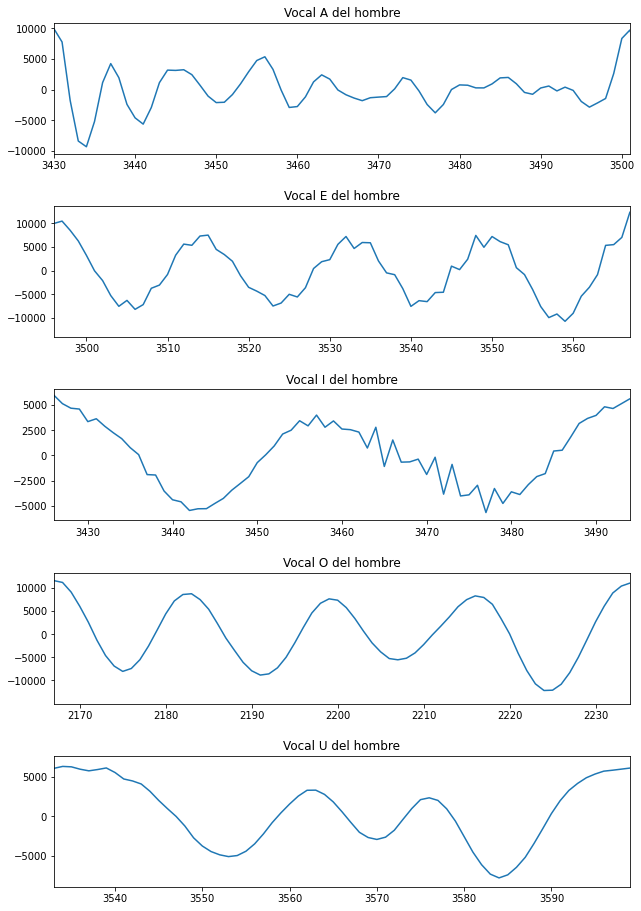

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure()                                                              #Todo el código que procede en esta función es el ploteo de las señales ya obtenidas
fig.set_figwidth(20)                                                              # y de limitarlas para facilitar el análisis de frecuencia y periodo
fig.set_figheight(5)
figure, axis = plt.subplots(5,1,figsize=(10,15))
axis[0].plot(ha)
axis[0].set_title("Vocal A del hombre")
axis[0].set_xlim(3430,3501)

axis[1].plot(he)
axis[1].set_title("Vocal E del hombre")
axis[1].set_xlim(3496,3567)

axis[2].plot(hi)
axis[2].set_title("Vocal I del hombre")
axis[2].set_xlim(3426,3494)

axis[3].plot(ho)
axis[3].set_title("Vocal O del hombre")
axis[3].set_xlim(2167,2234)

axis[4].plot(hu)
axis[4].set_title("Vocal U del hombre")
axis[4].set_xlim(3533,3599)

plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4) 
plt.show()

<Figure size 1440x360 with 0 Axes>

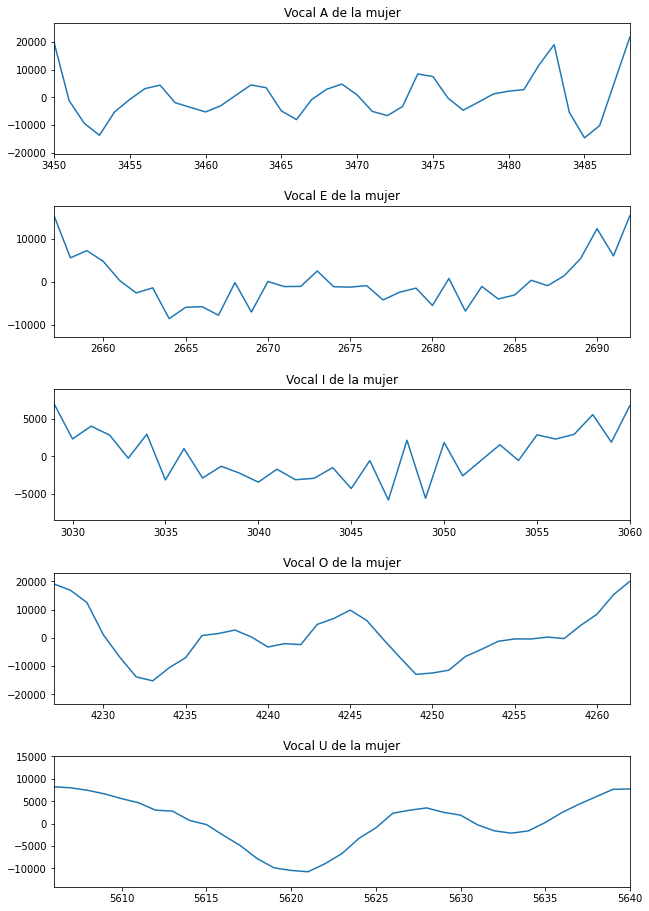

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure()                                                              #Todo el código que procede en esta función es el ploteo de las señales ya obtenidas
fig.set_figwidth(20)                                                              # y de limitarlas para facilitar el análisis de frecuencia y periodo
fig.set_figheight(5)
figure, axis = plt.subplots(5,1,figsize=(10,15))
axis[0].plot(ma)
axis[0].set_title("Vocal A de la mujer")
axis[0].set_xlim(3450,3488)

axis[1].plot(me)
axis[1].set_title("Vocal E de la mujer")
axis[1].set_xlim(2657,2692)

axis[2].plot(mi)
axis[2].set_title("Vocal I de la mujer")
axis[2].set_xlim(3029,3060)

axis[3].plot(mo)
axis[3].set_title("Vocal O de la mujer")
axis[3].set_xlim(4227,4262)

axis[4].plot(mu)
axis[4].set_title("Vocal U de la mujer")
axis[4].set_xlim(5606,5640)

plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4) 
plt.show()

In [16]:
#Para hombre
f_ha = frecuenciaPeriodo(vocal="a", genero="un hombre", muestras = 3501-3430)
f_he = frecuenciaPeriodo(vocal="e", genero="un hombre", muestras = 3567-3496)
f_hi = frecuenciaPeriodo(vocal="i", genero="un hombre", muestras = 3494-3426)
f_ho = frecuenciaPeriodo(vocal="o", genero="un hombre", muestras = 2234-2167)
f_hu = frecuenciaPeriodo(vocal="u", genero="un hombre", muestras = 3599-3533)
print("\n")
#Para mujer
f_ma = frecuenciaPeriodo(vocal="a", genero="una mujer", muestras = 3488-3450)
f_me = frecuenciaPeriodo(vocal="e", genero="una mujer", muestras = 2692-2657)
f_mi = frecuenciaPeriodo(vocal="i", genero="una mujer", muestras = 3060-3029)
f_mo = frecuenciaPeriodo(vocal="o", genero="una mujer", muestras = 4262-4227)
f_mu = frecuenciaPeriodo(vocal="u", genero="una mujer", muestras = 5640-5606)

Para la vocal a pronunciada por un hombre, la frecuencia es igual a 112.67605633802818 Hertz y el periodo es igual a 0.008875 segundos
Para la vocal e pronunciada por un hombre, la frecuencia es igual a 112.67605633802818 Hertz y el periodo es igual a 0.008875 segundos
Para la vocal i pronunciada por un hombre, la frecuencia es igual a 117.6470588235294 Hertz y el periodo es igual a 0.0085 segundos
Para la vocal o pronunciada por un hombre, la frecuencia es igual a 119.40298507462686 Hertz y el periodo es igual a 0.008375 segundos
Para la vocal u pronunciada por un hombre, la frecuencia es igual a 121.2121212121212 Hertz y el periodo es igual a 0.00825 segundos


Para la vocal a pronunciada por una mujer, la frecuencia es igual a 210.5263157894737 Hertz y el periodo es igual a 0.00475 segundos
Para la vocal e pronunciada por una mujer, la frecuencia es igual a 228.57142857142856 Hertz y el periodo es igual a 0.004375 segundos
Para la vocal i pronunciada por una mujer, la frecuencia es 

In [17]:
#Cálculo de las aproximaciones para la frecuencia del hombre y de la mujer
f_hPromedio = (f_ha + f_he + f_hi + f_ho + f_hu)/5
f_mPromedio = (f_ma + f_me + f_mi + f_mo + f_mu)/5

print("El valor aproximado para la frecuencia del hombre es "+str(f_hPromedio)+" y para la frecuencia de la mujer es "+str(f_mPromedio))

El valor aproximado para la frecuencia del hombre es 116.72285555726678 y para la frecuencia de la mujer es 232.20556134168436


La diferencia entre la frecuencia de la voz del hombre y la frecuencia de la mujer, se debe las diferencias de las cuerdas vocales de ambos géneros.

En el caso de las mujeres, dichos músculos son de tamaño reducido en comparación a los de los hombres. De esta forma, vibran un número elevado de veces por segundo, la cual genera un aumento en la tensión de las cuerdas, la voz se eleva y se produce un sonido agudo.

Por su parte, para los hombres se tiene una menor frecuencia de la voz, presentándose menos vibraciones por segundo en sus cuerdas vocales. Esto provoca que la tensión en las cuerdas disminuya, la voz desciende y se percibe más grave.

##Parte 2

###Función generadora de señal

Se crea una función generadora de señales con atributos de entrada:


*   freq: frecuencia de la señal en Hz
*   amp: amplitud de la señal

Crea una señal compuesta por 3 señales cosenoidales de frecuencias distintas,una con frecuencia freq, otra con frecuencia 5*freq y la tercera con frecuencia 10*freq



In [18]:
def generator(freq, amp):
  x = np.linspace(0,3,10000,endpoint=True)                               
  y = amp * np.cos(2*np.pi*freq*x) + 0.5 * amp * np.cos(2*np.pi*5*freq*x) + 0.2 * amp * np.cos(2*np.pi* 10 *freq*x)

  #Ploteo de la gráfica
  f = plt.figure()
  f.set_figwidth(24)
  f.set_figheight(5)
  plt.plot(x,y)
  plt.show()
  return(x, y)


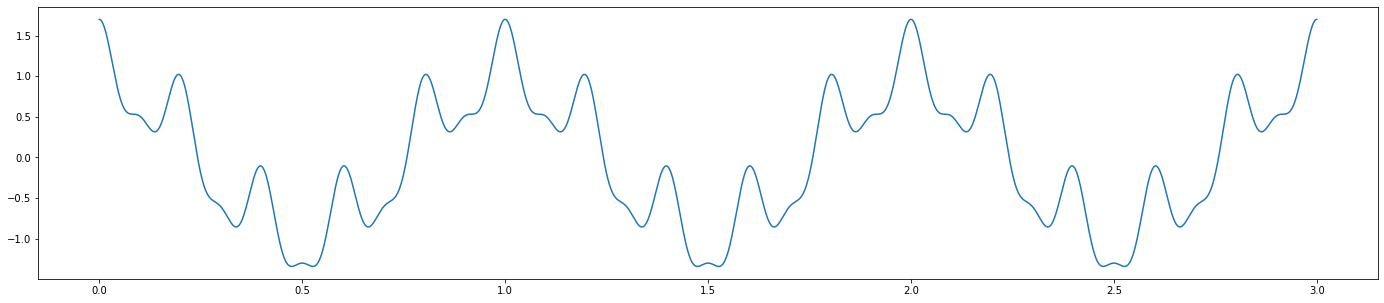

In [19]:
x1, y1 = generator(1, 1)

###Filtros FIR

In [20]:
st_FIR = time.time()

####High Pass Filter

In [21]:
numtaps = 3001
f = 9
fs = 4000
nyquist = fs//2
norm_cutoff = f/nyquist


In [22]:
hpf = signal.firwin(numtaps, norm_cutoff, pass_zero=False)

In [23]:
hfs = signal.lfilter(hpf, 1, y1)

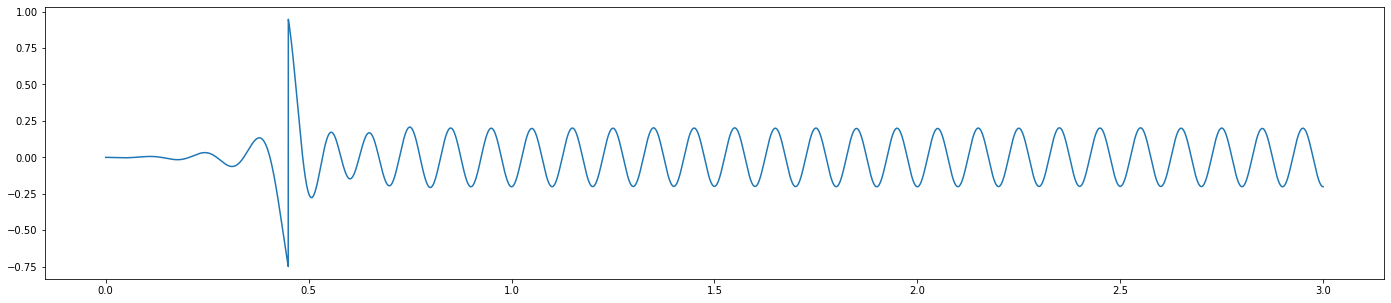

In [24]:
x = np.linspace(0,3,10000,endpoint=True)
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(5)
plt.plot(x,hfs)
plt.show()



####Low Pass Filter

In [25]:
numtaps = 3001
f = 3
fs = 20000
nyquist = fs//2
norm_cutoff = f/nyquist

In [26]:
lpf = signal.firwin(numtaps, norm_cutoff, pass_zero="lowpass")

In [27]:
lfs = signal.lfilter(lpf, 1, y1)

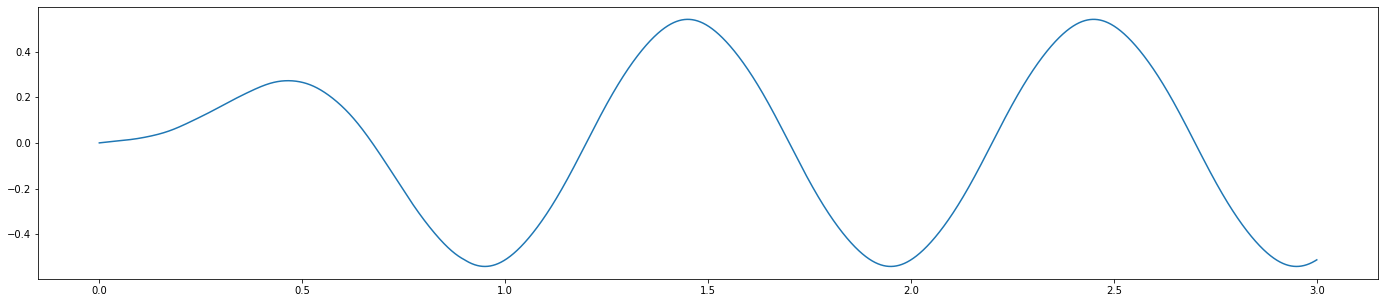

In [28]:
x = np.linspace(0,3,10000,endpoint=True)
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(5)
plt.plot(x,lfs)
plt.show()



####Band Pass Filter

In [29]:
numtaps = 3001
f = [3, 7]
fs = 2600
nyquist = fs//2
norm_cutoff = [f[0]/nyquist, f[1]/nyquist]

In [30]:
bpf = signal.firwin(numtaps, norm_cutoff, pass_zero="bandpass")
bfs = signal.lfilter(bpf, 1, y1)

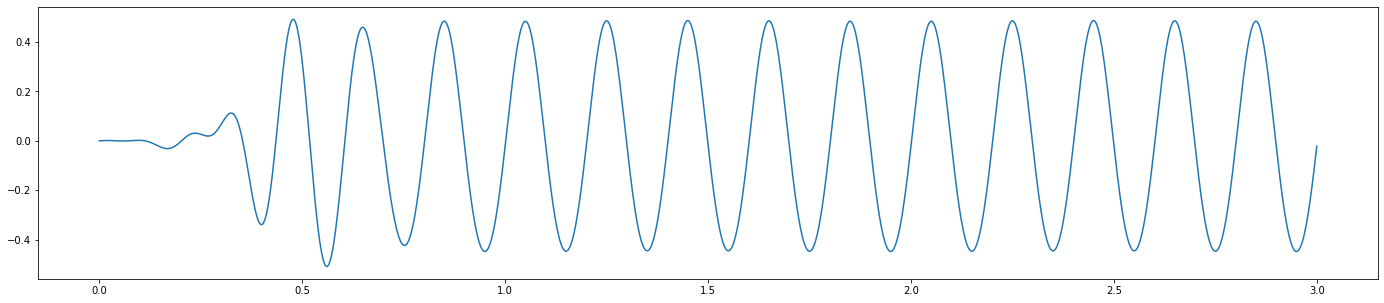

In [31]:
x = np.linspace(0,3,10000,endpoint=True)
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(5)
plt.plot(x,bfs)
plt.show()

In [32]:
et_FIR = time.time()
tiempo_FIR = et_FIR - st_FIR
print(tiempo_FIR)

3.169178009033203


###Filtros IIR

In [33]:
st_IIR = time.time()

#### High Pass Filter

In [34]:
numtaps = 4
f = 8
fs = 3000
nyquist = fs//2
norm_cutoff = f / nyquist

In [35]:
b, a = signal.butter(numtaps, norm_cutoff, btype='highpass', analog=False)

In [36]:
hps_iir = signal.lfilter(b, a, y1)

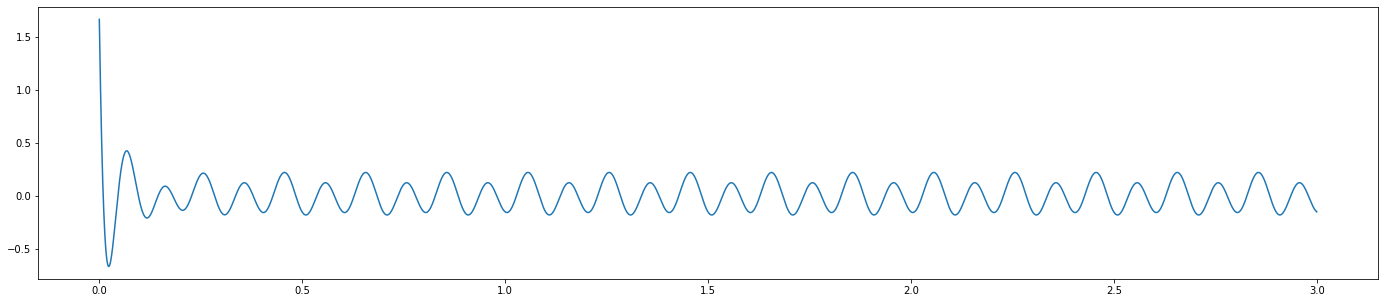

In [37]:
x = np.linspace(0,3,10000,endpoint=True)
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(5)
plt.plot(x,hps_iir)
plt.show()

#### Low Pass Filter

In [38]:
numtaps = 4
f = 3
fs = 5000
nyquist = fs//2
norm_cutoff = f / nyquist

In [39]:
b, a = signal.butter(numtaps, norm_cutoff, btype='lowpass', analog=False)

In [40]:
lps_iir = signal.lfilter(b, a, y1)

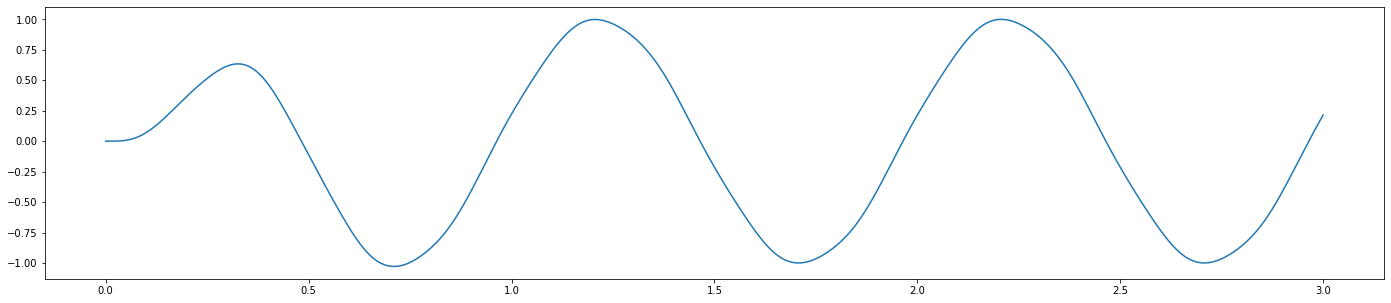

In [41]:
x = np.linspace(0,3,10000,endpoint=True)
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(5)
plt.plot(x,lps_iir)
plt.show()

#### Band Pass Filter

In [42]:
numtaps = 3
f = [3, 8]
fs = 3500
nyquist = fs//2
norm_cutoff = [f[0] / nyquist, f[1] / nyquist]

In [43]:
b, a = signal.butter(numtaps, norm_cutoff, btype='bandpass', analog=False)

In [44]:
bps_iir = signal.lfilter(b, a, y1)

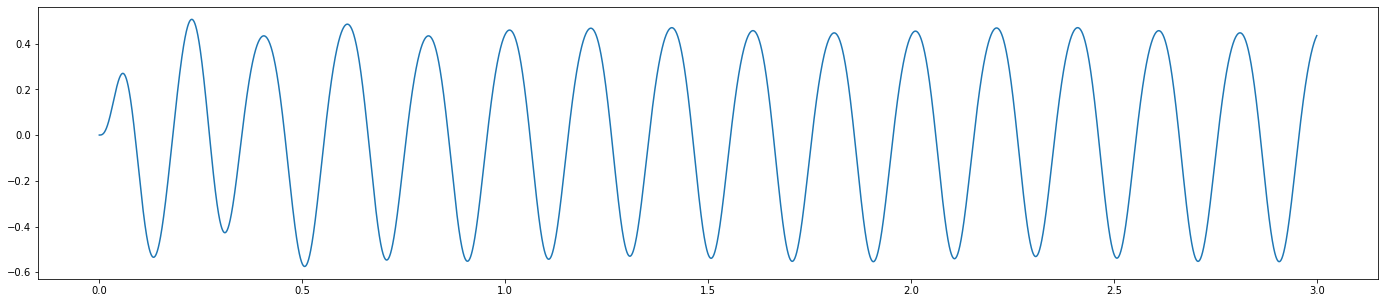

In [45]:
x = np.linspace(0,3,10000,endpoint=True)
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(5)
plt.plot(x,bps_iir)
plt.show()

In [46]:
et_IIR = time.time()

### Tiempo de ejecución

In [47]:
tiempo_IIR = et_IIR - st_IIR
print("Tiempo de ejecución de los filtros IIR",tiempo_IIR)
print("Tiempo de ejecución de los filtros FIR",tiempo_FIR)

Tiempo de ejecución de los filtros IIR 3.452829599380493
Tiempo de ejecución de los filtros FIR 3.169178009033203


###Señales filtradas por FIR

In [48]:
x = np.linspace(0,3,10000,endpoint=True)


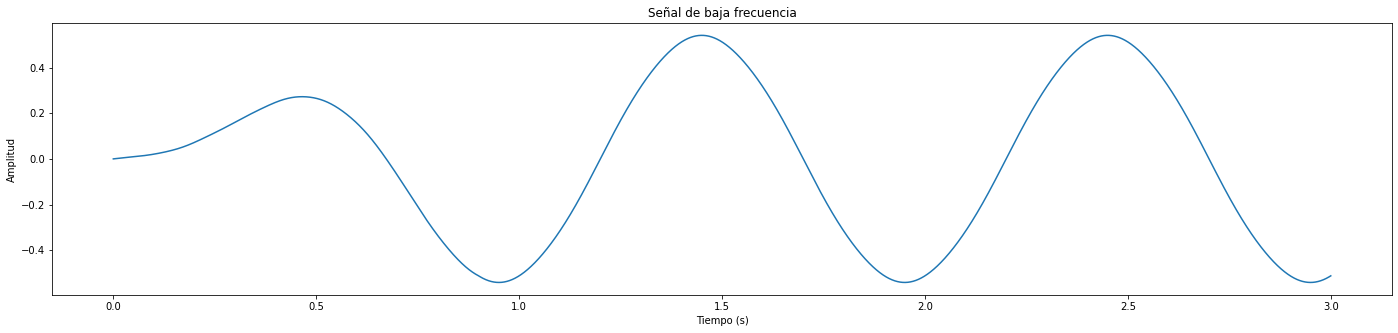

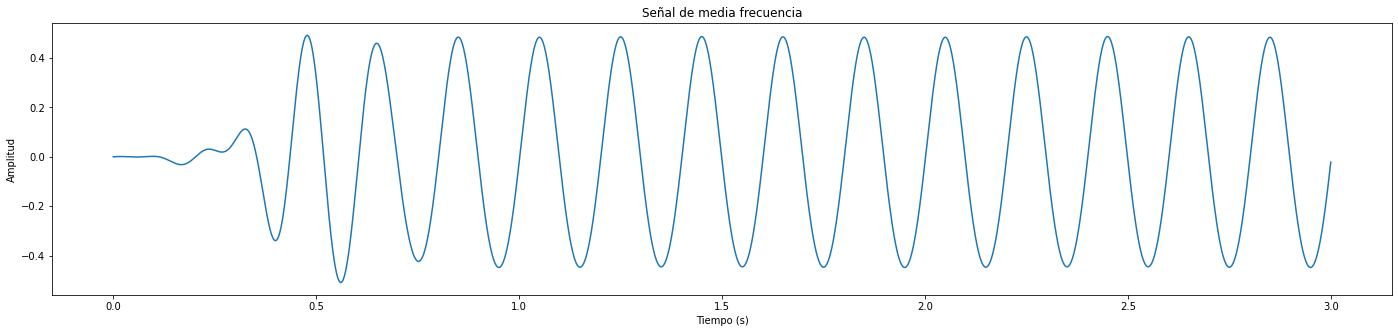

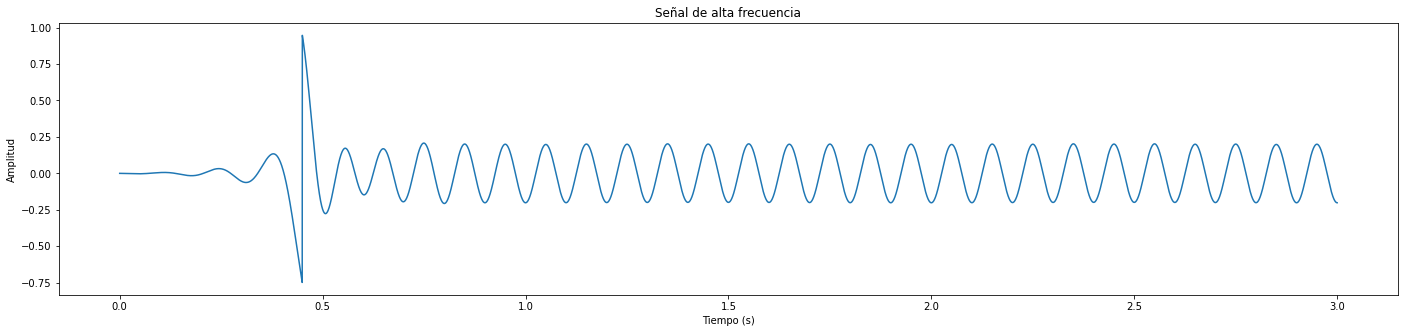

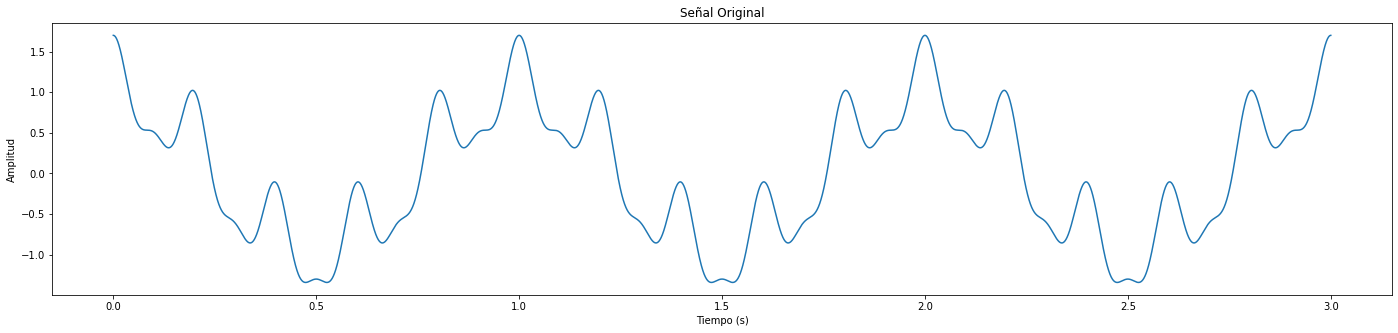

In [49]:
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(5)
plt.plot(x,lfs)
plt.title("Señal de baja frecuencia")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(5)
plt.plot(x,bfs)
plt.title("Señal de media frecuencia")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(5)
plt.plot(x,hfs)
plt.title("Señal de alta frecuencia")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(5)
plt.plot(x,y1)
plt.title("Señal Original")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()

###Señales filtradas por IIR

In [50]:
x = np.linspace(0,3,10000,endpoint=True)

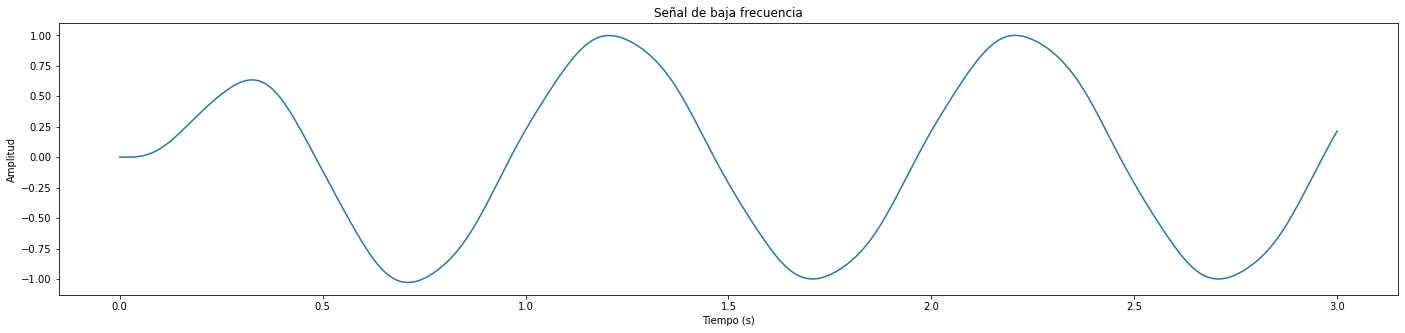

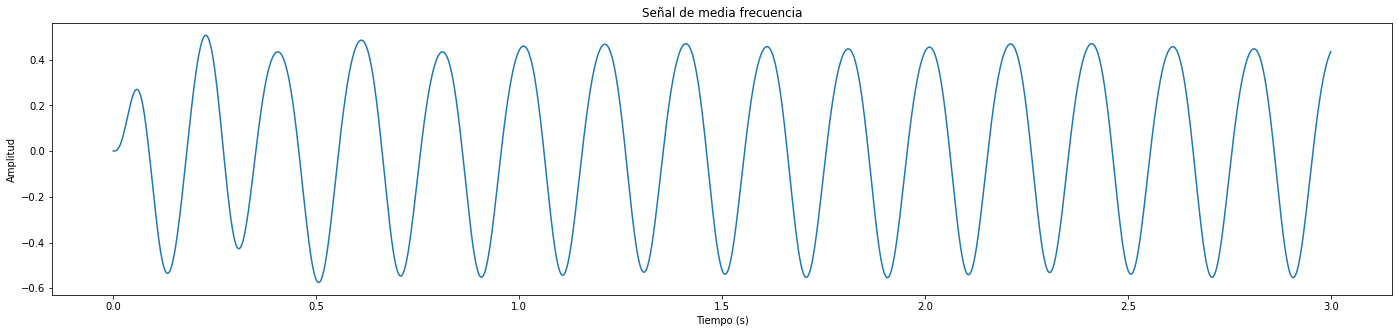

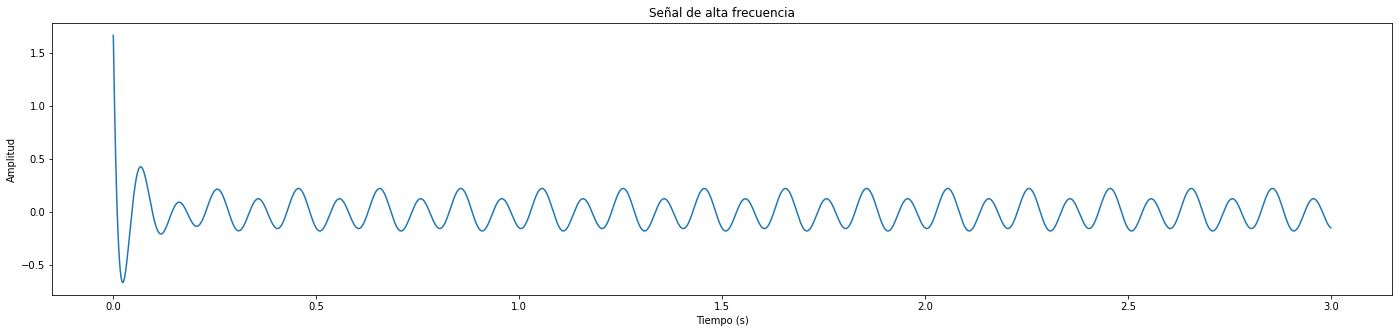

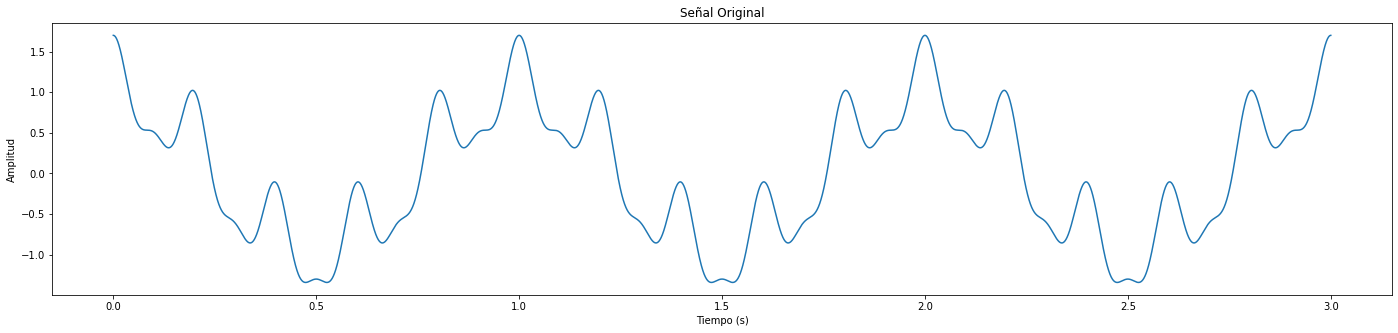

In [51]:
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(5)
plt.plot(x,lps_iir)
plt.title("Señal de baja frecuencia")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(5)
plt.plot(x,bps_iir)
plt.title("Señal de media frecuencia")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(5)
plt.plot(x,hps_iir)
plt.title("Señal de alta frecuencia")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(5)
plt.plot(x,y1)
plt.title("Señal Original")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()

### Comparación de resultados 

Primeramente se analizará el tiempo de ejecución obtenidos para cada caso, la implementación de los filtros FIR y la implementación de los filtros IIR. Como se conoce de la teoría, los filtros IIR utilizan usualmente menos coeficientes que los FIR. Al tener que calcularse una cantidad considerablemente menor de coeficientes, el tiempo de computo también se ve notablemente disminuido. Se obtiene en el caso implementado un tiempo de computo de 1.0435s para los filtros IIR y 0.8877s para los FIR. 

Con respecto a las señales filtradas obtenidas se deben analizar varios puntos. Primero que nada, es notable en el caso de los filtros FIR una mayor cantidad de tiempo necesaria para que la señal se estabilice. Al comparar entre sí los resultados del filtro pasa-baja, pasa-banda y pasa-alta en términos de velocidad de estabilización, la velocidad de estabilización de señales de alta frecuencia es mayor para ambos casos, los FIR y los IIR.

Finalmente es importante analizar un fenómeno que se presenta en el filtro pasa-alta en el cual, aunque se obtiene una señal con la frecuencia esperada, la amplitud disminuye y aumenta ligeramente entre ciclo y ciclo. Este fenomeno solo sucede o al menos solo es notable en este caso específico. 

Tomando en cuenta todos los puntos expuestos anteriormente, se puede concluir que para este caso específico, si se prioriza la señal de salida sobre el tiempo de computo, los filtros FIR obtienen mejores resultados. 

###Guía de parámetros de filtros


El proceso de diseño para los filtros fue iterativo y se tantearon varios de los parámetros de entrada para obtener una señal filtrada limpia. La función que genera el filtro FIR es scipy.signal.firwin, la cual utiliza los siguientes parámetros: numtaps, norm_cutoff, pass_zero=False
 

*   Numtaps: Se refiere al tamaño o número de coeficientes del filtro. Este número debe ser impar si se implementa un filtro pasabandas que incluya la frecuencia de Nyquist. En el caso del FIR se utiliza 3001 como este parámetro y para IIR 4. Esta gran diferencia en el número de coeficientes es la casua de la diferencia en el tiempo de cómputo. 
*   Cutoff: Es la frecuencia de corte del filtro normalizada con respecto a la frecuencia de nyquist, es decir, se divide la frecuencia de corte entre la frecuencia de Nyquist para obtener este parámetro. La frecuencia de corte de los filtros pasa-baja es de 3Hz, la del pasa-alta de 9Hz y el filtro pasa-banda posee dos frecuencias de corte, 3 y 7Hz. 
* Pass_zero: Este parámetro puede ser False, True o alguno de los strings siguientes:  ‘bandpass’, ‘lowpass’, ‘highpass’, ‘bandstop’. Si se define False, la ganancia DC será de 0 y si se define True esta ganancia será de 1. 